# Unevenly Spaced Data

In [1]:
using Multitaper, Plots, FINUFFT

The generalized prolate spheroidal sequences (Bronez, 1988) solve the generalized eigenvalue equation when the observing times are unevenly spaced. We follow the example in (Chave, 2019).

In [2]:
N = 500
t = (0.0:(N-1)).^(1.05)

W = 0.008
K = 5
f0 = 0.0

lam, u = Multitaper.gpss_orth(W, K, t, f0);

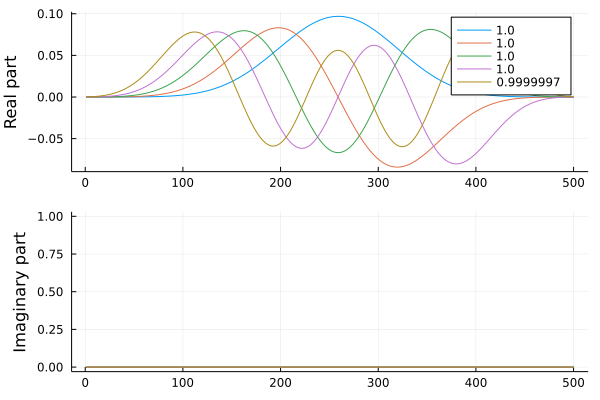

In [3]:
p1 = plot(real.(u), ylabel="Real part", label = round.(lam, digits= 7)') 
p2 = plot(imag.(u), ylabel="Imaginary part", legend = false) 

plot(p1, p2, layout = (2,1))

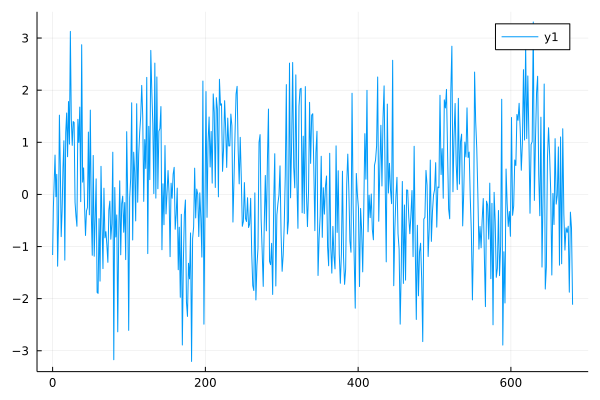

In [4]:
x = sin.(2*pi*0.01*t) + randn(N)
plot(t,x)

In [5]:
freq = collect(LinRange(-pi, pi, length(t)))
Pxx = abs2.(nufft1d3(t,ComplexF64.(x),-1,1e-15,freq))/N;

In [13]:
using Profile

@profile Sb = bspec(t, x[:,1], W, K, 0.5, 0.0, false)

MTSpectrum{EigenCoefficient,Array{Float64,1},Nothing}([0.0, 0.002, 0.004, 0.006, 0.008, 0.01, 0.012, 0.014, 0.016, 0.018  …  0.48, 0.482, 0.484, 0.48600000000000004, 0.488, 0.49, 0.492, 0.494, 0.49599999999999994, 0.498], [0.24307236717853914, 0.3319145981488152, 0.27501563857452205, 0.29619067503314955, 0.2729081659445355, 0.27349376410634973, 0.24315640493057492, 0.1618828144244989, 0.15310379557802234, 0.31846061223614847  …  0.22238192178042476, 0.24680619932991732, 1.8812071899036245, 3.576930243593476, 3.6732979527030856, 3.7314982722693864, 3.429951063293354, 3.6647392528321077, 3.440168151819775, 2.100968500794655], nothing, MTParameters(4.0, 5, 500, 1.0, 500, 1, nothing), EigenCoefficient(Complex{Float64}[-0.04330093667502741 + 0.3864881749172393im -0.25851807493070844 + 0.5584355496845154im … 0.01674964463845293 + 0.0437075617744931im 0.192557860991186 + 0.4945632861005874im; -0.19361527812170123 - 0.335750568232863im 0.03392058633231206 + 0.15213640193186173im … 0.6079127267

In [8]:
Profile.print()

Overhead ╎ [+additional indent] Count File:Line; Function
   6╎6     @Base/special/trig.jl:29; sin(::Float64)
   6╎6     @Base/special/trig.jl:173; sincos(::Float64)
   1╎1     @Base/special/trig.jl:193; sincos(::Float64)
   2╎2     @Base/special/trig.jl:195; sincos(::Float64)
   2╎2     @Base/special/trig.jl:197; sincos(::Float64)
    ╎7611  @Base/task.jl:356; (::IJulia.var"#15#18")()
    ╎ 7611  ...ia/src/eventloop.jl:8; eventloop(::ZMQ.Socket)
    ╎  7611  @Base/essentials.jl:709; invokelatest
    ╎   7611  @Base/essentials.jl:710; #invokelatest#1
    ╎    7611  ...execute_request.jl:67; execute_request(::ZMQ.Socket...
    ╎     7611  ...oftGlobalScope.jl:65; softscope_include_string(::M...
   1╎    ╎ 7611  @Base/loading.jl:1091; include_string(::Function,...
    ╎    ╎  1     ...ler/typeinfer.jl:601; typeinf_ext(::Core.MethodI...
    ╎    ╎   1     ...ler/typeinfer.jl:570; typeinf_ext(::Core.Method...
    ╎    ╎    1     ...ler/typeinfer.jl:12; typeinf(::Core.Compiler.I...
    ╎   

    ╎    ╎    ╎    ╎  2     ...rc/bronez.jl:119; #gpss_orth#62
    ╎    ╎    ╎    ╎   2     .../cholesky.jl:417; getproperty
    ╎    ╎    ╎    ╎    2     ...ranspose.jl:179; copy
    ╎    ╎    ╎    ╎     2     ...ranspose.jl:76; adjoint!
    ╎    ╎    ╎    ╎    ╎ 2     ...ranspose.jl:109; transpose_f!(::typ...
    ╎    ╎    ╎    ╎    ╎  1     ...anspose.jl:128; transposeblock!(:...
    ╎    ╎    ╎    ╎    ╎   1     ...anspose.jl:124; transposeblock!(...
    ╎    ╎    ╎    ╎    ╎    1     ...nspose.jl:129; transposeblock!(...
    ╎    ╎    ╎    ╎    ╎     1     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎  1     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎   1     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    1     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎     1     ...nspose.jl:129; transposeblock!...
    ╎    ╎    ╎

    ╎    ╎    ╎    ╎    ╎    ╎   43    ...adcast.jl:931; copyto!
    ╎    ╎    ╎    ╎    ╎    ╎    36    ...mdloop.jl:77; macro expansion
    ╎    ╎    ╎    ╎    ╎    ╎     36    ...adcast.jl:932; macro expansion
    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 11    ...adcast.jl:575; getindex
    ╎    ╎    ╎    ╎    ╎    ╎    ╎  11    ...adcast.jl:621; _broadcast_geti...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎   11    ...adcast.jl:648; _broadcast_geti...
  11╎    ╎    ╎    ╎    ╎    ╎    ╎    11    .../float.jl:405; *
    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 25    ...sional.jl:559; setindex!
  25╎    ╎    ╎    ╎    ╎    ╎    ╎  25    .../array.jl:849; setindex!
    ╎    ╎    ╎    ╎    ╎    ╎    7     ...mdloop.jl:78; macro expansion
   7╎    ╎    ╎    ╎    ╎    ╎     7     @Base/int.jl:86; +
    ╎    ╎    ╎    ╎    ╎ 296   ...c/bronez.jl:49; gpss(::Float64, ::...
  15╎    ╎    ╎    ╎    ╎  15    ...e/array.jl:0; getindex
   9╎    ╎    ╎    ╎    ╎  9     ...e/array.jl:809; getindex
  70╎    ╎    ╎    ╎    ╎

   6╎    ╎    ╎    ╎    ╎    ╎    ╎   6     .../float.jl:410; muladd
    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...rators.jl:538; *
   1╎    ╎    ╎    ╎    ╎    ╎    ╎  1     .../float.jl:405; *
    ╎    ╎    ╎    ╎    ╎    ╎     3     ...l/trig.jl:74; sin_kernel
   3╎    ╎    ╎    ╎    ╎    ╎    ╎ 3     .../float.jl:405; *
    ╎    ╎    ╎    ╎    ╎    ╎     28    ...l/trig.jl:75; sin_kernel
  11╎    ╎    ╎    ╎    ╎    ╎    ╎ 11    .../float.jl:405; *
  17╎    ╎    ╎    ╎    ╎    ╎    ╎ 17    .../float.jl:403; -
   1╎    ╎    ╎    ╎    ╎    ╎    25    ...l/trig.jl:50; sin(::Float64)
    ╎    ╎    ╎    ╎    ╎    ╎     5     ...l/trig.jl:140; cos_kernel
   1╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     .../float.jl:405; *
   1╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     .../float.jl:401; +
    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...e/math.jl:122; evalpoly
    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     ...e/math.jl:123; macro expansion
   1╎    ╎    ╎    ╎    ╎    ╎    ╎   1     .../float.jl:410; muladd
 

   3╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 3     .../float.jl:405; *
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    7     ...l/trig.jl:141; cos_kernel
   7╎    ╎    ╎    ╎    ╎    ╎    ╎     7     .../float.jl:405; *
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    15    ...l/trig.jl:143; cos_kernel
   2╎    ╎    ╎    ╎    ╎    ╎    ╎     2     .../float.jl:401; +
  13╎    ╎    ╎    ╎    ╎    ╎    ╎     13    .../float.jl:403; -
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    10    ...l/trig.jl:71; sin_kernel
  10╎    ╎    ╎    ╎    ╎    ╎    ╎     10    .../float.jl:405; *
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    8     ...l/trig.jl:72; sin_kernel
   8╎    ╎    ╎    ╎    ╎    ╎    ╎     8     .../float.jl:405; *
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    21    ...l/trig.jl:73; sin_kernel
   5╎    ╎    ╎    ╎    ╎    ╎    ╎     5     .../float.jl:401; +
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     8     ...e/math.jl:122; evalpoly
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 8     ...e/math.jl:123; macro expansion
   8╎    ╎    ╎ 

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    2     ...rators.jl:538; *
   2╎    ╎    ╎    ╎    ╎    ╎    ╎     2     .../float.jl:405; *
    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1     ...l/trig.jl:141; cos_kernel
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    1     .../float.jl:405; *
    ╎    ╎    ╎    ╎    ╎    ╎    ╎   21    ...l/trig.jl:143; cos_kernel
   4╎    ╎    ╎    ╎    ╎    ╎    ╎    4     .../float.jl:405; *
  12╎    ╎    ╎    ╎    ╎    ╎    ╎    12    .../float.jl:401; +
   5╎    ╎    ╎    ╎    ╎    ╎    ╎    5     .../float.jl:403; -
    ╎    ╎    ╎    ╎    ╎     1     ...adcast.jl:621; _broadcast_geti...
    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...adcast.jl:648; _broadcast_geti...
   1╎    ╎    ╎    ╎    ╎    ╎  1     .../float.jl:403; -
    ╎    ╎    ╎    ╎    ╎  9     ...erators.jl:538; *
    ╎    ╎    ╎    ╎    ╎   9     ...erators.jl:526; afoldl
    ╎    ╎    ╎    ╎    ╎    9     ...rators.jl:525; afoldl
    ╎    ╎    ╎    ╎    ╎     9     ...omplex.jl:321; *
   9╎    ╎    ╎    ╎    ╎   

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1     ...nspose.jl:118; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     ...number.jl:169; adjoint
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎     1     ...omplex.jl:263; conj
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +1 1     .../float.jl:393; -
    ╎    ╎    ╎    ╎    ╎    ╎    ╎  3     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎   3     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    2     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     2     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 2     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  2     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎   2     ...nspose.jl:118; transposeblock!...
   2╎    ╎    ╎    ╎    ╎  

   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     .../array.jl:849; setindex!
    ╎    ╎    ╎    ╎    ╎    ╎    ╎   2     ...nspose.jl:129; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    2     ...nspose.jl:129; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     2     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 2     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1     ...nspose.jl:118; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     ...number.jl:169; adjoint
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎     1     ...omplex.jl:263; conj
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +1 1     .../float.jl:393; -
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1     ...nspose.jl:118; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎     1     ...omplex.jl:263; conj
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +1 1     .../float.jl:393; -
    ╎    ╎    ╎    ╎    ╎    ╎    ╎   2     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    2     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     2     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 2     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  2     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎   2     ...nspose.jl:118; transposeblock!...
   2╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎    2     .../array.jl:849; setindex!
    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 7     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎  2     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:129; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1     ...nspose.jl:118; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     ...number.jl:169; adjoint
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎     1     ...omplex.jl:263; conj
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +1 1     .../float.jl:393; -
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     2     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 2     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  2     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎   2     ...nspose.jl:118; transposeblock!...
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     .../array.jl:849; setindex!
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     ...number.jl:169; adjoint
    ╎    ╎    ╎    ╎    ╎    ╎  

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    2     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     1     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     ...nspose.jl:129; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1     ...nspose.jl:118; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     ...number.jl:169; adjoint
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎     1     ...omplex.jl:263; conj
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +1 1     .../float.jl:393; -
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     1     ...nspose.jl:129; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:129; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1     ...nspose.jl:118; transposeblock!...
   1╎    ╎    ╎    ╎ 

    ╎    ╎    ╎    ╎    ╎    ╎    6     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎     1     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     ...nspose.jl:129; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     1     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1     ...nspose.jl:118; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     .../range.jl:624; iterate
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎     1     ...motion.jl:398; ==
    ╎    ╎    ╎    ╎    ╎    ╎     5 

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     1     ...nspose.jl:129; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:129; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1     ...nspose.jl:118; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     ...number.jl:169; adjoint
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎     1     ...omplex.jl:263; conj
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +1 1     .../float.jl:393; -
    ╎    ╎    ╎    ╎    ╎    ╎     1     ...nspose.jl:129; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1 

    ╎    ╎    ╎    ╎    ╎    ╎    ╎     1     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:129; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1     ...nspose.jl:118; transposeblock!...
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     .../array.jl:849; setindex!
    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 4     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     1     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     ...nspose.jl:129; transposeblock!...
    ╎    ╎

    ╎    ╎    ╎    ╎    ╎    ╎    ╎   2     ...nspose.jl:129; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     1     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1     ...nspose.jl:118; transposeblock!...
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     .../array.jl:810; getindex
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     ...nspose.jl:129; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     1     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:129; transposeblock!...
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     @Base/int.jl:85; -
    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎ 

    ╎    ╎    ╎    ╎    ╎   98    ...scaling.jl:433; Array
    ╎    ╎    ╎    ╎    ╎    98    ...caling.jl:426; Array{Complex{Fl...
    ╎    ╎    ╎    ╎    ╎     98    .../array.jl:526; zeros
    ╎    ╎    ╎    ╎    ╎    ╎ 98    .../array.jl:357; fill!
   5╎    ╎    ╎    ╎    ╎    ╎  5     .../array.jl:847; setindex!
    ╎    ╎    ╎    ╎    ╎    ╎  93    .../range.jl:624; iterate
  93╎    ╎    ╎    ╎    ╎    ╎   93    ...motion.jl:398; ==
    ╎    ╎    ╎    ╎    ╎  695   ...angular.jl:814; inv
    ╎    ╎    ╎    ╎    ╎   584   ...angular.jl:767; ldiv!
 584╎    ╎    ╎    ╎    ╎    584   ...lapack.jl:3391; trtrs!(::Char, ...
    ╎    ╎    ╎    ╎    ╎   111   ...scaling.jl:433; Array
    ╎    ╎    ╎    ╎    ╎    111   ...caling.jl:426; Array{Complex{Fl...
    ╎    ╎    ╎    ╎    ╎     27    .../array.jl:525; zeros
    ╎    ╎    ╎    ╎    ╎    ╎ 27    ...e/boot.jl:432; Array
  27╎    ╎    ╎    ╎    ╎    ╎  27    ...e/boot.jl:424; Array
    ╎    ╎    ╎    ╎    ╎     84    .../array.jl:526; 

    ╎    ╎    ╎    ╎    ╎ 162   ...ranspose.jl:179; copy
    ╎    ╎    ╎    ╎    ╎  1     ...ctarray.jl:630; similar
    ╎    ╎    ╎    ╎    ╎   1     ...e/array.jl:380; similar
    ╎    ╎    ╎    ╎    ╎    1     ...e/boot.jl:432; Array
   1╎    ╎    ╎    ╎    ╎     1     ...e/boot.jl:424; Array
    ╎    ╎    ╎    ╎    ╎  161   ...anspose.jl:76; adjoint!
    ╎    ╎    ╎    ╎    ╎   161   ...anspose.jl:109; transpose_f!(::t...
    ╎    ╎    ╎    ╎    ╎    106   ...nspose.jl:128; transposeblock!(...
    ╎    ╎    ╎    ╎    ╎     57    ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎ 37    ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎  18    ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎   12    ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    5     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎     5     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 3     ..

    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     1     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:118; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     .../range.jl:624; iterate
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1     ...motion.jl:398; ==
    ╎    ╎    ╎    ╎    ╎    ╎     2     ...nspose.jl:129; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 2     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎  2     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     ...n

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:118; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     ...number.jl:169; adjoint
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1     ...omplex.jl:263; conj
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     .../float.jl:393; -
    ╎    ╎    ╎    ╎    ╎    ╎    7     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎     5     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 4     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎  2     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     ...nspose.jl:129; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     1     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:118; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     ...numbe

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     1     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:118; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     ...number.jl:169; adjoint
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1     ...omplex.jl:263; conj
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     .../float.jl:393; -
    ╎    ╎    ╎    ╎    ╎    ╎    1     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎     1     ...nspose.jl:129; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     1     ...nspose.jl

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:118; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     ...number.jl:169; adjoint
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1     ...omplex.jl:263; conj
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     .../float.jl:393; -
    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     1     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:118; transposeblock!...
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     .../array.jl:849; setindex!
    ╎    ╎    ╎    ╎    ╎    ╎    5     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎     1     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:129; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     ...nspose.jl:129;

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:118; transposeblock!...
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     .../array.jl:849; setindex!
    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     1     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:118; transposeblock!...
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     .../array.jl:849; setindex!
    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     ...nspose.jl:129; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     1     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:118; transposeblock!...
   1╎    ╎    ╎    ╎    

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     1     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:118; transposeblock!...
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     .../array.jl:849; setindex!
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     ...nspose.jl:129; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     1     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:118; transposeblock!...
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     .../array.jl:849; setindex!
    ╎    ╎    ╎    ╎    ╎    ╎     1     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:129; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎  

    ╎    ╎    ╎    ╎    ╎    ╎    ╎  2     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎   2     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    2     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     2     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 2     ...nspose.jl:118; transposeblock!...
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     .../array.jl:849; setindex!
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     ...number.jl:169; adjoint
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1     ...omplex.jl:263; conj
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     .../float.jl:393; -
    ╎    ╎    ╎    ╎    ╎    55    ...nspose.jl:129; transposeblock!(...
    ╎    ╎    ╎    ╎    ╎     27    ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎ 14    ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎  8     ...nspose.jl:124; transposeblock!...
   

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     1     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:118; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     ...number.jl:169; adjoint
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1     ...omplex.jl:263; conj
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     .../float.jl:393; -
    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:129; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     1     ...nspose.jl:129; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:118; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1   

    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     1     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:118; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     ...number.jl:169; adjoint
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1     ...omplex.jl:263; conj
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     .../float.jl:393; -
    ╎    ╎    ╎    ╎    ╎    ╎   4     ...nspose.jl:129; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    4     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎     2     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:124; tran

    ╎    ╎    ╎    ╎    ╎    ╎    ╎     1     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:118; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     ...number.jl:169; adjoint
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1     ...omplex.jl:263; conj
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     .../float.jl:393; -
    ╎    ╎    ╎    ╎    ╎    ╎  8     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎   5     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    4     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎     2     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 2     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎  2     ...nspose.jl:129; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     ...nspose.jl:128; transpos

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     ...nspose.jl:128; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     1     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:118; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     ...number.jl:169; adjoint
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1     ...omplex.jl:263; conj
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     .../float.jl:393; -
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1     ...nspose.jl:129; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     1     ...nspose.jl:124; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:118; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     .../range.jl:624; iterate
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1     ...motion.jl:398; ==
    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...nspose.jl:125; transposeblock!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     ...nspose.jl:129; tr

In [16]:
plot(Sb.f, Sb.S, xlims = [0.0, 0.5])
plot!(freq/(2*pi), Pxx/4, yscale = :log10, label = "pgram")

LoadError: [91mUndefVarError: Sb not defined[39m

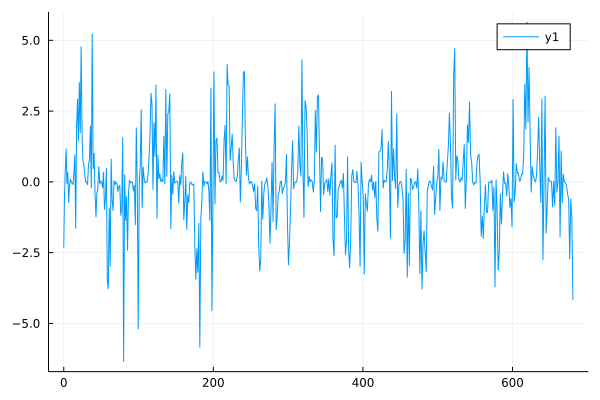

In [7]:
y = x .* (1 .+ cos.(2*pi*0.05*t))
plot(t,y)

At present, there is an issue where this multivariate routine gives fft-shifted results. Looking into it.

In [8]:
@profile Sxy = bspec(t, hcat(x,y), W, K, 0.5, 0.0)
Profile.print()

Overhead ╎ [+additional indent] Count File:Line; Function
   1╎1     @Base/arraymath.jl:30; -(::Array{Complex{Float64},1})
   1╎1     ...ompiler/ssair/ir.jl:295; getindex(::Core.Compiler.UseRef)
   1╎1     ...mpiler/utilities.jl:172; argextype(::Any, ::Core.Compil...
   1╎1     @Base/expr.jl:60; copy_exprargs(::Array{Any,1})
  24╎24    @Base/special/trig.jl:29; sin(::Float64)
  22╎22    @Base/special/trig.jl:173; sincos(::Float64)
   1╎1     @Base/special/trig.jl:193; sincos(::Float64)
   4╎4     @Base/special/trig.jl:195; sincos(::Float64)
   2╎2     @Base/special/trig.jl:197; sincos(::Float64)
    ╎23690 @Base/task.jl:356; (::IJulia.var"#15#18")()
    ╎ 23690 ...ia/src/eventloop.jl:8; eventloop(::ZMQ.Socket)
    ╎  23690 @Base/essentials.jl:709; invokelatest
    ╎   23690 @Base/essentials.jl:710; #invokelatest#1
    ╎    23690 ...execute_request.jl:67; execute_request(::ZMQ.Socket...
    ╎     23690 ...oftGlobalScope.jl:65; softscope_include_string(::M...
 735╎    ╎ 23690 @Base/loadi

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +40 1     ...tation.jl:1270; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +41 1     ...tation.jl:1005; abstract_eval(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +42 1     ...tation.jl:911; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +43 1     ...tation.jl:926; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +44 1     ...tation.jl:904; abstract_call_k...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +45 1     ...tation.jl:134; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +46 1     ...tation.jl:266; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +47 1     ...einfer.jl:12; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +48 1     ...tation.jl:1326; typeinf_nocycle...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +49 1     ...tation.jl:1270; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +50 1     ...tation.jl:1005; abstract_eval(:...
    ╎    ╎    ╎    ╎    ╎   

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +43 1     ...tation.jl:926; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +44 1     ...tation.jl:904; abstract_call_k...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +45 1     ...tation.jl:134; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +46 1     ...tation.jl:266; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +47 1     ...einfer.jl:12; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +48 1     ...tation.jl:1326; typeinf_nocycle...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +49 1     ...tation.jl:1270; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +50 1     ...tation.jl:1005; abstract_eval(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +51 1     ...tation.jl:911; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +52 1     ...tation.jl:926; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +53 1     ...tation.jl:904; abstract_call_k...
   1╎    ╎    ╎    ╎    ╎    ╎

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +33 1     ...tation.jl:419; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +34 1     ...einfer.jl:484; typeinf_edge(::...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +35 1     ...einfer.jl:12; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +36 1     ...tation.jl:1326; typeinf_nocycle...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +37 1     ...tation.jl:1270; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +38 1     ...tation.jl:1005; abstract_eval(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +39 1     ...tation.jl:911; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +40 1     ...tation.jl:924; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +41 1     ...tation.jl:111; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +42 1     ...tation.jl:419; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +43 1     ...einfer.jl:484; typeinf_edge(::...
    ╎    ╎    ╎    ╎    ╎    ╎

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +57 2     ...tation.jl:419; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +58 2     ...einfer.jl:484; typeinf_edge(::...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +59 1     ...einfer.jl:12; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +60 1     ...tation.jl:1326; typeinf_nocycle...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +61 1     ...tation.jl:1270; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +62 1     ...tation.jl:1005; abstract_eval(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +63 1     ...tation.jl:911; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +64 1     ...tation.jl:926; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +65 1     ...tation.jl:904; abstract_call_k...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +66 1     ...tation.jl:111; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +67 1     ...tation.jl:419; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +27 2     ...tation.jl:924; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +28 1     ...tation.jl:55; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +29 1     ...iddict.jl:152; get!(::Core.Com...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +30 1     ...tation.jl:57; #216
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +31 1     ...ection.jl:861; _methods_by_ftype
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +28 1     ...tation.jl:111; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +29 1     ...tation.jl:419; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +30 1     ...einfer.jl:454; typeinf_edge(::...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +31 1     ...lities.jl:128; specialize_method
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +32 1     ...lities.jl:133; specialize_method
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +19 4     ...tation.jl:134; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +20 1     

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +38 1     ...lining.jl:73; ssa_inlining_pass!
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +39 1     ...lining.jl:1045; assemble_inline...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +40 1     ...lining.jl:702; analyze_method!...
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +41 1     ...lities.jl:131; specialize_method
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +15 19    ...tation.jl:904; abstract_call_k...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +16 19    ...tation.jl:111; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +17 19    ...tation.jl:419; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +18 19    ...einfer.jl:484; typeinf_edge(::...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +19 16    ...einfer.jl:12; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +20 16    ...tation.jl:1326; typeinf_nocycle...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +21 16    ...tation.jl:1270; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎  

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +58 2     ...einfer.jl:484; typeinf_edge(::...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +59 1     ...einfer.jl:12; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +60 1     ...tation.jl:1326; typeinf_nocycle...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +61 1     ...tation.jl:1255; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +62 1     ...tation.jl:1005; abstract_eval(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +63 1     ...tation.jl:911; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +64 1     ...tation.jl:926; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +65 1     ...tation.jl:904; abstract_call_k...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +66 1     ...tation.jl:111; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +67 1     ...tation.jl:419; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +68 1     ...einfer.jl:484; typeinf_edge(::...
    ╎    ╎    ╎    ╎    ╎    ╎

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +26 1     ...legacy.jl:20; inflate_ir(::Co...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +27 1     ...air/ir.jl:179; compute_basic_b...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +28 1     .../array.jl:935; push!
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +29 1     .../array.jl:892; _growend!
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +21 1     ...driver.jl:140; run_passes(::Co...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +22 1     ...air/ir.jl:1296; compact!
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +23 1     ...air/ir.jl:1298; compact!(::Core...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +24 1     ...tarray.jl:2009; foreach
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +25 1     ...air/ir.jl:1151; iterate(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +26 1     ...air/ir.jl:984; process_node!
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +27 1     ...air/ir.jl:925; process_node!(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +28 1     ...air/ir.jl:812; renumber

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +21 1     ...tation.jl:1255; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +22 1     ...tation.jl:1005; abstract_eval(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +23 1     ...tation.jl:911; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +24 1     ...tation.jl:926; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +25 1     ...tation.jl:904; abstract_call_k...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +26 1     ...tation.jl:111; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +27 1     ...tation.jl:419; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +28 1     ...einfer.jl:484; typeinf_edge(::...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +29 1     ...einfer.jl:12; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +30 1     ...tation.jl:1326; typeinf_nocycle...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +31 1     ...tation.jl:1270; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +44 6     ...tation.jl:926; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +45 6     ...tation.jl:904; abstract_call_k...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +46 4     ...tation.jl:111; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +47 4     ...tation.jl:419; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +48 4     ...einfer.jl:484; typeinf_edge(::...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +49 3     ...einfer.jl:12; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +50 3     ...tation.jl:1326; typeinf_nocycle...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +51 3     ...tation.jl:1270; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +52 3     ...tation.jl:1005; abstract_eval(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +53 3     ...tation.jl:911; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +54 3     ...tation.jl:926; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +54 1     ...tation.jl:926; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +55 1     ...tation.jl:904; abstract_call_k...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +56 1     ...tation.jl:111; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +57 1     ...tation.jl:419; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +58 1     ...einfer.jl:484; typeinf_edge(::...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +59 1     ...einfer.jl:12; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +60 1     ...tation.jl:1326; typeinf_nocycle...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +61 1     ...tation.jl:1270; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +62 1     ...tation.jl:1005; abstract_eval(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +63 1     ...tation.jl:911; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +64 1     ...tation.jl:926; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +89 2     ...einfer.jl:12; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +90 2     ...tation.jl:1326; typeinf_nocycle...
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +91 1     ...tation.jl:1258; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +91 1     ...tation.jl:1270; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +92 1     ...tation.jl:1005; abstract_eval(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +93 1     ...tation.jl:911; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +94 1     ...tation.jl:926; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +95 1     ...tation.jl:904; abstract_call_k...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +96 1     ...tation.jl:111; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +97 1     ...tation.jl:419; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +98 1     ...einfer.jl:484; typeinf_edge(::...
    ╎    ╎    ╎    ╎    ╎    

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +49 1     ...einfer.jl:21; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +50 1     ...einfer.jl:149; finish
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +51 1     ...einfer.jl:295; type_annotate!(...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +39 1     ...einfer.jl:33; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +40 1     ...timize.jl:174; optimize(::Core...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +41 1     ...driver.jl:138; run_passes(::Co...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +42 1     ...lining.jl:76; ssa_inlining_pass!
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +43 1     ...lining.jl:551; batch_inline!(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +44 1     ...lining.jl:314; ir_inline_item!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +45 1     ...lining.jl:1116; mk_tuplecall!(:...
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +46 1     ...ueries.jl:71; compact_exprtype
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +36 4   

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +37 1     .../array.jl:785; iterate
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +38 1     @Base/int.jl:447; <
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +39 1     ...e/bool.jl:40; &
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +32 1     ...lining.jl:76; ssa_inlining_pass!
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +33 1     ...lining.jl:551; batch_inline!(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +34 1     ...lining.jl:332; ir_inline_item!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +35 1     ...air/ir.jl:1094; iterate
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +36 1     ...air/ir.jl:1166; iterate(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +31 1     ...driver.jl:140; run_passes(::Co...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +32 1     ...air/ir.jl:1296; compact!
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +33 1     ...air/ir.jl:1298; compact!(::Core...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +34 1     ...tarray.jl:2009; foreach
    ╎    ╎    ╎   

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +9 1     ...result.jl:47; matching_cache_...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +10 1     ...result.jl:64; matching_cache_...
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +11 1     .../array.jl:418; getindex(::Type...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +7 1     ...tation.jl:266; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +8 1     ...einfer.jl:33; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +9 1     ...timize.jl:174; optimize(::Core...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +10 1     ...driver.jl:134; run_passes(::Co...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +11 1     ...driver.jl:127; slot2reg
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +12 1     ...ot2ssa.jl:863; construct_ssa!(...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +13 1     ...ot2ssa.jl:96; new_to_regular(...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +14 1     ...air/ir.jl:385; iterate
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +15 1     ...air

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +22 1     ...tation.jl:904; abstract_call_k...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +23 1     ...tation.jl:134; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +24 1     ...tation.jl:266; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +25 1     ...einfer.jl:12; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +26 1     ...tation.jl:1326; typeinf_nocycle...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +27 1     ...tation.jl:1270; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +28 1     ...tation.jl:1005; abstract_eval(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +29 1     ...tation.jl:911; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +30 1     ...tation.jl:926; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +31 1     ...tation.jl:904; abstract_call_k...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +32 1     ...tation.jl:134; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎

    ╎    ╎    ╎    ╎    ╎    ╎   1     ...tation.jl:57; #216
   1╎    ╎    ╎    ╎    ╎    ╎    1     ...ection.jl:861; _methods_by_ftype
    ╎    ╎    ╎    ╎    ╎    ╎ 147   ...tation.jl:111; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎  147   ...tation.jl:419; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎   1     ...einfer.jl:454; typeinf_edge(::...
    ╎    ╎    ╎    ╎    ╎    ╎    1     ...lities.jl:128; specialize_method
   1╎    ╎    ╎    ╎    ╎    ╎     1     ...lities.jl:133; specialize_method
    ╎    ╎    ╎    ╎    ╎    ╎   146   ...einfer.jl:484; typeinf_edge(::...
    ╎    ╎    ╎    ╎    ╎    ╎    144   ...einfer.jl:12; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎     144   ...tation.jl:1326; typeinf_nocycle...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 144   ...tation.jl:1270; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎  144   ...tation.jl:1005; abstract_eval(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎   144   ...tation.jl:911; abstract_call(:...
    ╎    ╎  

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +23 2     ...tation.jl:419; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +24 2     ...einfer.jl:484; typeinf_edge(::...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +25 1     ...einfer.jl:12; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +26 1     ...tation.jl:1326; typeinf_nocycle...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +27 1     ...tation.jl:1270; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +28 1     ...tation.jl:1005; abstract_eval(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +29 1     ...tation.jl:911; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +30 1     ...tation.jl:926; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +31 1     ...tation.jl:904; abstract_call_k...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +32 1     ...tation.jl:134; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +33 1     ...tation.jl:266; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +53 2     ...tation.jl:911; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +54 2     ...tation.jl:926; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +55 2     ...tation.jl:904; abstract_call_k...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +56 2     ...tation.jl:111; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +57 2     ...tation.jl:419; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +58 2     ...einfer.jl:484; typeinf_edge(::...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +59 1     ...einfer.jl:12; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +60 1     ...tation.jl:1326; typeinf_nocycle...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +61 1     ...tation.jl:1270; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +62 1     ...tation.jl:1005; abstract_eval(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +63 1     ...tation.jl:911; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +24 1     ...lining.jl:702; analyze_method!...
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +25 1     ...lities.jl:131; specialize_method
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +24 1     ...lining.jl:735; analyze_method!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +25 1     ...legacy.jl:10; inflate_ir(::Co...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +26 1     ...legacy.jl:20; inflate_ir(::Co...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +27 1     ...air/ir.jl:179; compute_basic_b...
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +28 1     ...rators.jl:140; iterate
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +1 126   ...tation.jl:1270; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +2 126   ...tation.jl:1005; abstract_eval(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +3 126   ...tation.jl:911; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +4 126   ...tation.jl:926; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +5

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +89 1     ...einfer.jl:33; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +90 1     ...timize.jl:174; optimize(::Core...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +91 1     ...driver.jl:138; run_passes(::Co...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +92 1     ...lining.jl:76; ssa_inlining_pass!
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +93 1     ...lining.jl:551; batch_inline!(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +94 1     ...lining.jl:395; ir_inline_item!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +95 1     ...air/ir.jl:723; setindex!
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +96 1     ...air/ir.jl:716; setindex!(::Cor...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +97 1     ...air/ir.jl:598; count_added_nod...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +98 1     ...air/ir.jl:385; iterate
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +99 1     ...air/ir.jl:391; iterate(::Core....
   1╎    ╎    ╎    ╎    ╎    ╎    ╎     +100 1     ...

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +46 3     ...tation.jl:1326; typeinf_nocycle...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +47 3     ...tation.jl:1270; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +48 3     ...tation.jl:1005; abstract_eval(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +49 3     ...tation.jl:911; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +50 3     ...tation.jl:926; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +51 3     ...tation.jl:904; abstract_call_k...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +52 3     ...tation.jl:134; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +53 3     ...tation.jl:266; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +54 2     ...einfer.jl:12; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +55 2     ...tation.jl:1326; typeinf_nocycle...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +56 2     ...tation.jl:1270; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎   

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +16 1     ...tation.jl:55; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +17 1     ...iddict.jl:152; get!(::Core.Com...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +18 1     ...tation.jl:57; #216
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +19 1     ...ection.jl:861; _methods_by_ftype
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +16 98    ...tation.jl:111; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +17 98    ...tation.jl:419; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +18 98    ...einfer.jl:484; typeinf_edge(::...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +19 92    ...einfer.jl:12; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +20 92    ...tation.jl:1326; typeinf_nocycle...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +21 2     ...tation.jl:1255; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +22 2     ...tation.jl:1005; abstract_eval(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +23 2 

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +44 1     ...lities.jl:91; get_staged(::Co...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +45 1     ...ection.jl:1037; may_invoke_gene...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +46 1     ...ection.jl:1050; may_invoke_gene...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +47 1     ...ection.jl:925; methods(::Any)
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +48 1     ...ection.jl:925; methods
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +49 1     ...ection.jl:907; methods(::Any, ...
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +50 1     .../array.jl:583; collect(::Type{...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +35 81    ...tation.jl:904; abstract_call_k...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +36 81    ...tation.jl:111; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +37 81    ...tation.jl:419; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +38 81    ...einfer.jl:484; typeinf_edge(::...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +39 8

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +95 1     ...tation.jl:911; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +96 1     ...tation.jl:926; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +97 1     ...tation.jl:904; abstract_call_k...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +98 1     ...tation.jl:134; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +99 1     ...tation.jl:266; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +100 1     ...einfer.jl:12; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +101 1     ...tation.jl:1326; typeinf_nocycle...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +102 1     ...tation.jl:1270; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +103 1     ...tation.jl:1005; abstract_eval(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +104 1     ...tation.jl:911; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +105 1     ...tation.jl:926; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +94 1     ...driver.jl:148; run_passes(::Co...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +95 1     ...passes.jl:919; type_lift_pass!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +96 1     .../array.jl:413; getindex
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +97 1     ...e/boot.jl:441; Array
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +98 1     ...e/boot.jl:422; Array
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +85 1     ...tation.jl:903; abstract_call_k...
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +86 1     ...eutils.jl:46; argtypes_to_type
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +85 28    ...tation.jl:904; abstract_call_k...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +86 27    ...tation.jl:111; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +87 27    ...tation.jl:419; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +88 27    ...einfer.jl:484; typeinf_edge(::...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +89 26    ...einfer.jl:12; typ

    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +106 14    ...tation.jl:111; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +107 14    ...tation.jl:419; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +108 14    ...einfer.jl:484; typeinf_edge(::...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +109 14    ...einfer.jl:12; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +110 14    ...tation.jl:1326; typeinf_nocycle...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +111 3     ...tation.jl:1255; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +112 3     ...tation.jl:1005; abstract_eval(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +113 3     ...tation.jl:911; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +114 3     ...tation.jl:926; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +115 3     ...tation.jl:904; abstract_call_k...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +116 3     ...tation.jl:111; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎

    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +184 1     ...einfer.jl:484; typeinf_edge(::...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +185 1     ...einfer.jl:12; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +186 1     ...tation.jl:1326; typeinf_nocycle...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +187 1     ...tation.jl:1255; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +188 1     ...tation.jl:1005; abstract_eval(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +189 1     ...tation.jl:911; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +190 1     ...tation.jl:926; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +191 1     ...tation.jl:903; abstract_call_k...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +192 1     ...eutils.jl:46; argtypes_to_type
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +193 1     ...lities.jl:39; anymap(::typeof...
   1╎    ╎    ╎    ╎    ╎    ╎    ╎     +194 1     .../array.jl:809; getindex
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +132

    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +117 4     ...tation.jl:419; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +118 1     ...einfer.jl:475; typeinf_edge(::...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +119 1     ...estate.jl:118; Core.Compiler.I...
   1╎    ╎    ╎    ╎    ╎    ╎    ╎     +120 1     ...lities.jl:110; retrieve_code_info
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +118 3     ...einfer.jl:484; typeinf_edge(::...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +119 3     ...einfer.jl:12; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +120 3     ...tation.jl:1326; typeinf_nocycle...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +121 3     ...tation.jl:1270; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +122 3     ...tation.jl:1005; abstract_eval(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +123 3     ...tation.jl:911; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +124 3     ...tation.jl:926; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎

    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +145 1     .../array.jl:785; iterate
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +146 1     @Base/int.jl:447; <
   1╎    ╎    ╎    ╎    ╎    ╎    ╎     +147 1     ...e/bool.jl:40; &
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +99 4     ...einfer.jl:33; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +100 4     ...timize.jl:174; optimize(::Core...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +101 2     ...driver.jl:133; run_passes(::Co...
   1╎    ╎    ╎    ╎    ╎    ╎    ╎     +102 1     ...driver.jl:119; convert_to_irco...
   1╎    ╎    ╎    ╎    ╎    ╎    ╎     +102 1     ...e/expr.jl:60; copy_exprargs(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +101 1     ...driver.jl:138; run_passes(::Co...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +102 1     ...lining.jl:73; ssa_inlining_pass!
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +103 1     ...lining.jl:1045; assemble_inline...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +104 1     ...lining.jl:735; analyze_met

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +63 1     ...lining.jl:551; batch_inline!(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +64 1     ...lining.jl:336; ir_inline_item!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +65 1     ...air/ir.jl:723; setindex!
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +66 1     ...air/ir.jl:710; setindex!(::Cor...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +67 1     ...rators.jl:350; >=
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +68 1     @Base/int.jl:441; <=
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +56 26    ...tation.jl:134; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +57 26    ...tation.jl:266; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +58 25    ...einfer.jl:12; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +59 25    ...tation.jl:1326; typeinf_nocycle...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +60 25    ...tation.jl:1270; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +61 25    ...tation.jl:1005; ab

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +22 1     ...lining.jl:73; ssa_inlining_pass!
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +23 1     ...lining.jl:1035; assemble_inline...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +24 1     .../array.jl:425; getindex
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +25 1     ...e/boot.jl:441; Array
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +26 1     ...e/boot.jl:422; Array
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +22 1     ...lining.jl:76; ssa_inlining_pass!
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +23 1     ...lining.jl:551; batch_inline!(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +24 1     ...lining.jl:337; ir_inline_item!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +25 1     ...lining.jl:1242; ssa_substitute!
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +26 1     ...lining.jl:1287; ssa_substitute_...
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +27 1     ...air/ir.jl:386; iterate(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +21 1     ...driver.jl:142; r

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +7 3     ...tation.jl:1326; typeinf_nocycle...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +8 3     ...tation.jl:1270; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +9 3     ...tation.jl:1005; abstract_eval(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +10 3     ...tation.jl:911; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +11 3     ...tation.jl:926; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +12 1     ...tation.jl:903; abstract_call_k...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +13 1     ...eutils.jl:46; argtypes_to_type
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +14 1     ...lities.jl:39; anymap(::typeof...
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +15 1     ...attice.jl:206; widenconst(::Co...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +12 2     ...tation.jl:904; abstract_call_k...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +13 2     ...tation.jl:134; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎   

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎     1     ...ot2ssa.jl:739; construct_ssa!(...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +1 1     ...ot2ssa.jl:183; rename_uses!
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +2 1     ...ot2ssa.jl:123; fixemup!(::Core...
    ╎    ╎    ╎ 1547  ...erpretation.jl:1270; typeinf_local(::Core.Co...
    ╎    ╎    ╎  1     ...erpretation.jl:999; abstract_eval(::Any, :...
    ╎    ╎    ╎   1     ...erpretation.jl:987; abstract_eval(::Any, :...
   1╎    ╎    ╎    1     ...rpretation.jl:1128; abstract_eval_global
    ╎    ╎    ╎  1546  ...erpretation.jl:1005; abstract_eval(::Any, :...
    ╎    ╎    ╎   1546  ...erpretation.jl:911; abstract_call(::Array{...
    ╎    ╎    ╎    1546  ...rpretation.jl:926; abstract_call(::Array{...
    ╎    ╎    ╎     1546  ...rpretation.jl:904; abstract_call_known(:...
   1╎    ╎    ╎    ╎ 4     ...rpretation.jl:55; abstract_call_gf_by_t...
    ╎    ╎    ╎    ╎  3     @Base/iddict.jl:152; get!(::Core.Compiler...
    ╎    ╎    ╎  

   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1     .../array.jl:219; length
    ╎    ╎    ╎    ╎    ╎     35    ...tation.jl:904; abstract_call_k...
    ╎    ╎    ╎    ╎    ╎    ╎ 1     ...tation.jl:55; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎  1     ...iddict.jl:152; get!(::Core.Com...
    ╎    ╎    ╎    ╎    ╎    ╎   1     ...tation.jl:57; #216
   1╎    ╎    ╎    ╎    ╎    ╎    1     ...ection.jl:861; _methods_by_ftype
    ╎    ╎    ╎    ╎    ╎    ╎ 29    ...tation.jl:111; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎  29    ...tation.jl:419; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎   29    ...einfer.jl:484; typeinf_edge(::...
    ╎    ╎    ╎    ╎    ╎    ╎    29    ...einfer.jl:12; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎     29    ...tation.jl:1326; typeinf_nocycle...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 29    ...tation.jl:1270; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎  29    ...tation.jl:1005; abstract_eval(:...
    ╎    ╎    ╎    ╎    ╎   

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +17 1     ...tation.jl:926; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +18 1     ...tation.jl:904; abstract_call_k...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +19 1     ...tation.jl:111; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +20 1     ...tation.jl:419; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +21 1     ...einfer.jl:484; typeinf_edge(::...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +22 1     ...einfer.jl:12; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +23 1     ...tation.jl:1326; typeinf_nocycle...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +24 1     ...tation.jl:1255; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +25 1     ...tation.jl:1005; abstract_eval(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +26 1     ...tation.jl:911; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +27 1     ...tation.jl:926; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +27 1     ...tation.jl:419; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +28 1     ...einfer.jl:484; typeinf_edge(::...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +29 1     ...einfer.jl:12; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +30 1     ...tation.jl:1326; typeinf_nocycle...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +31 1     ...tation.jl:1270; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +32 1     ...tation.jl:1005; abstract_eval(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +33 1     ...tation.jl:911; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +34 1     ...tation.jl:926; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +35 1     ...tation.jl:904; abstract_call_k...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +36 1     ...tation.jl:111; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +37 1     ...tation.jl:419; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎     2     ...tation.jl:1005; abstract_eval(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +1 2     ...tation.jl:911; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +2 2     ...tation.jl:926; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +3 2     ...tation.jl:904; abstract_call_k...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +4 2     ...tation.jl:134; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +5 2     ...tation.jl:266; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +6 2     ...einfer.jl:12; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +7 2     ...tation.jl:1326; typeinf_nocycle...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +8 2     ...tation.jl:1270; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +9 2     ...tation.jl:1005; abstract_eval(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +10 2     ...tation.jl:911; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎     1     ...iddict.jl:152; get!(::Core.Com...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +1 1     ...tation.jl:57; #216
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +2 1     ...ection.jl:861; _methods_by_ftype
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎    2     ...tation.jl:111; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎     2     ...tation.jl:419; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +1 2     ...einfer.jl:484; typeinf_edge(::...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +2 2     ...einfer.jl:12; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +3 2     ...tation.jl:1326; typeinf_nocycle...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +4 2     ...tation.jl:1270; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +5 2     ...tation.jl:1005; abstract_eval(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +6 2     ...tation.jl:911; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +7 2 

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +23 4     ...tation.jl:911; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +24 2     ...tation.jl:924; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +25 2     ...tation.jl:111; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +26 2     ...tation.jl:419; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +27 2     ...einfer.jl:484; typeinf_edge(::...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +28 2     ...einfer.jl:12; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +29 2     ...tation.jl:1326; typeinf_nocycle...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +30 2     ...tation.jl:1270; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +31 2     ...tation.jl:1005; abstract_eval(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +32 2     ...tation.jl:911; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +33 1     ...tation.jl:924; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +18 1     ...lining.jl:73; ssa_inlining_pass!
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +19 1     ...lining.jl:1095; assemble_inline...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +20 1     ...lining.jl:707; analyze_method!...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +21 1     ...lining.jl:1304; find_inferred(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +22 1     ...result.jl:151; cache_lookup(::...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +23 1     .../array.jl:785; iterate
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +24 1     .../array.jl:785; iterate
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +25 1     .../array.jl:809; getindex
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +7 11    ...tation.jl:1270; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +8 11    ...tation.jl:1005; abstract_eval(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +9 11    ...tation.jl:911; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +10 5     ...tation.

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +48 1     ...e/expr.jl:60; copy_exprargs(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +49 1     ...e/expr.jl:43; copy_exprs(::Expr)
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +50 1     ...e/expr.jl:37; copy(::Expr)
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +51 1     ...e/expr.jl:60; copy_exprargs(:...
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +33 1     ...tation.jl:157; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +11 1     ...tation.jl:904; abstract_call_k...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +12 1     ...tation.jl:111; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +13 1     ...tation.jl:419; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +14 1     ...einfer.jl:484; typeinf_edge(::...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +15 1     ...einfer.jl:12; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +16 1     ...tation.jl:1326; typeinf_nocycle...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +48 2     ...tation.jl:704; abstract_call_k...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +49 2     ...tation.jl:635; abstract_apply(...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +50 2     ...tation.jl:926; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +51 2     ...tation.jl:904; abstract_call_k...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +52 2     ...tation.jl:111; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +53 2     ...tation.jl:419; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +54 2     ...einfer.jl:484; typeinf_edge(::...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +55 1     ...einfer.jl:12; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +56 1     ...tation.jl:1326; typeinf_nocycle...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +57 1     ...tation.jl:1255; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +58 1     ...tation.jl:1005; abstract_eval(:...
    ╎    ╎    ╎    ╎    ╎    ╎

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +16 1     ...tation.jl:911; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +17 1     ...tation.jl:926; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +18 1     ...tation.jl:904; abstract_call_k...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +19 1     ...tation.jl:55; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +20 1     ...iddict.jl:152; get!(::Core.Com...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +21 1     ...tation.jl:57; #216
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +22 1     ...ection.jl:861; _methods_by_ftype
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +14 17    ...tation.jl:1270; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +15 17    ...tation.jl:1005; abstract_eval(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +16 17    ...tation.jl:911; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +17 17    ...tation.jl:926; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +18 17

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +82 16    ...tation.jl:926; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +83 14    ...tation.jl:704; abstract_call_k...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +84 14    ...tation.jl:635; abstract_apply(...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +85 14    ...tation.jl:926; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +86 14    ...tation.jl:904; abstract_call_k...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +87 14    ...tation.jl:111; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +88 14    ...tation.jl:419; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +89 14    ...einfer.jl:484; typeinf_edge(::...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +90 12    ...einfer.jl:12; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +91 12    ...tation.jl:1326; typeinf_nocycle...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +92 2     ...tation.jl:1255; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎ 

    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +114 3     ...tation.jl:419; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +115 3     ...einfer.jl:484; typeinf_edge(::...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +116 3     ...einfer.jl:12; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +117 3     ...tation.jl:1326; typeinf_nocycle...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +118 3     ...tation.jl:1270; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +119 3     ...tation.jl:1005; abstract_eval(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +120 3     ...tation.jl:911; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +121 3     ...tation.jl:926; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +122 3     ...tation.jl:904; abstract_call_k...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +123 2     ...tation.jl:111; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +124 2     ...tation.jl:419; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎

    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +140 1     ...tation.jl:1326; typeinf_nocycle...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +141 1     ...tation.jl:1270; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +142 1     ...tation.jl:1005; abstract_eval(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +143 1     ...tation.jl:911; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +144 1     ...tation.jl:926; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +145 1     ...tation.jl:904; abstract_call_k...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +146 1     ...tation.jl:55; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +147 1     ...iddict.jl:152; get!(::Core.Com...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +148 1     ...tation.jl:57; #216
   1╎    ╎    ╎    ╎    ╎    ╎    ╎     +149 1     ...ection.jl:861; _methods_by_ftype
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +103 1     ...einfer.jl:33; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎     +104 1 

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +83 2     ...tation.jl:904; abstract_call_k...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +84 1     ...tation.jl:111; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +85 1     ...tation.jl:419; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +86 1     ...einfer.jl:484; typeinf_edge(::...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +87 1     ...einfer.jl:33; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +88 1     ...timize.jl:174; optimize(::Core...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +89 1     ...driver.jl:133; run_passes(::Co...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +90 1     ...e/expr.jl:60; copy_exprargs(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +91 1     ...e/expr.jl:43; copy_exprs(::Expr)
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +92 1     ...e/expr.jl:36; copy(::Expr)
   1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +93 1     ...e/boot.jl:240; Expr
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +84 1     ...ta

Excessive output truncated after 524345 bytes.

    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +46 12    ...tation.jl:111; abstract_call_g...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +47 12    ...tation.jl:419; abstract_call_m...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +48 12    ...einfer.jl:484; typeinf_edge(::...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +49 11    ...einfer.jl:12; typeinf(::Core....
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +50 11    ...tation.jl:1326; typeinf_nocycle...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +51 1     ...tation.jl:1255; typeinf_local(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +52 1     ...tation.jl:1005; abstract_eval(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +53 1     ...tation.jl:911; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +54 1     ...tation.jl:926; abstract_call(:...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +55 1     ...tation.jl:851; abstract_call_k...
    ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +56 1     ...tfuncs.jl:1524; return_type_tfu...
    ╎    ╎    ╎    ╎    ╎    

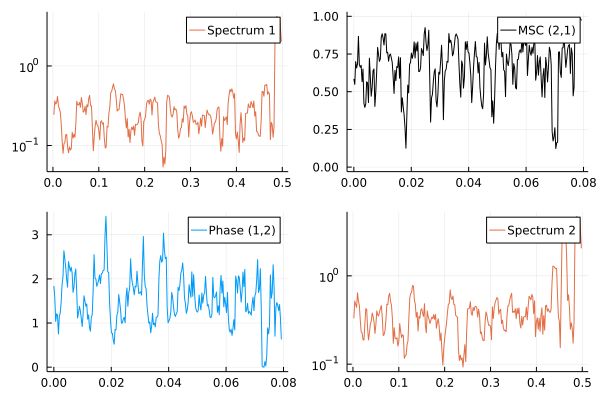

In [10]:
plot(Sxy)

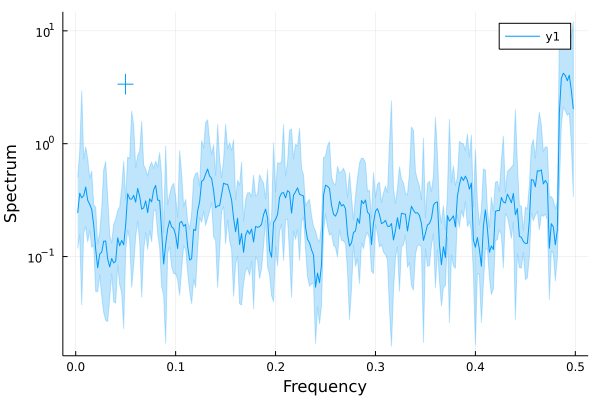

In [11]:
plot(Sxy[1][1])

In [11]:
#x = hcat(x,y)
p = 2
@profile specs   = map(y -> bspec(t, y, W, K,0.5, 0.0, false), x[:, k] for k in 1:p)


2-element Array{MTSpectrum{EigenCoefficient,Array{Float64,1},Nothing},1}:
 MTSpectrum{EigenCoefficient,Array{Float64,1},Nothing}([0.0, 0.002, 0.004, 0.006, 0.008, 0.01, 0.012, 0.014, 0.016, 0.018  …  0.48, 0.482, 0.484, 0.48600000000000004, 0.488, 0.49, 0.492, 0.494, 0.49599999999999994, 0.498], [0.24307236717853914, 0.3319145981488152, 0.27501563857452205, 0.29619067503314955, 0.2729081659445355, 0.27349376410634973, 0.24315640493057492, 0.1618828144244989, 0.15310379557802234, 0.31846061223614847  …  0.22238192178042476, 0.24680619932991732, 1.8812071899036245, 3.576930243593476, 3.6732979527030856, 3.7314982722693864, 3.429951063293354, 3.6647392528321077, 3.440168151819775, 2.100968500794655], nothing, MTParameters(4.0, 5, 500, 1.0, 500, 1, nothing), EigenCoefficient(Complex{Float64}[-0.04330093667502741 + 0.3864881749172393im -0.25851807493070844 + 0.5584355496845154im … 0.01674964463845293 + 0.0437075617744931im 0.192557860991186 + 0.4945632861005874im; -0.19361527812170123 - 0.3

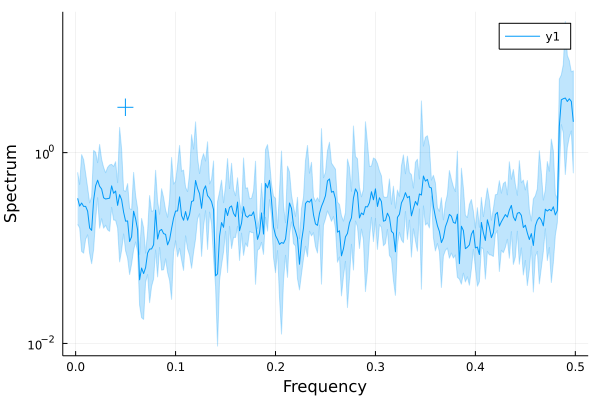

In [12]:
plot(specs[1])